In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing,Holt,ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa
import statsmodels.formula.api as smf

In [3]:
data = pd.read_csv('Downloads/footfalls.csv')
data

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0


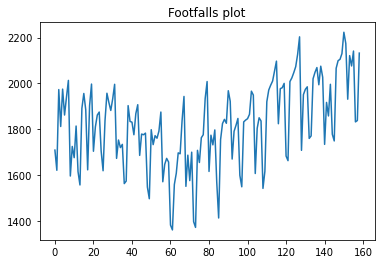

<Figure size 1152x576 with 0 Axes>

In [4]:
plt.plot(data['Footfalls'])
plt.title('Footfalls plot')
fig=plt.figure(figsize=(16,8))

Text(0.5, 1.0, 'Decomposition plot')

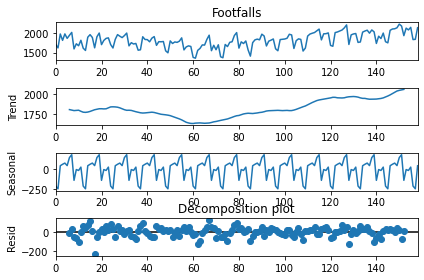

In [5]:
decompose = seasonal_decompose(data['Footfalls'],period=12)
decompose.plot()
plt.title('Decomposition plot')

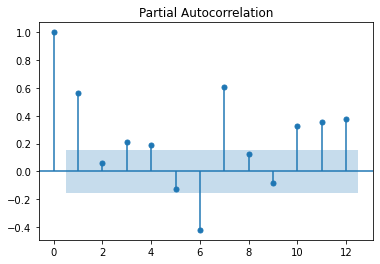

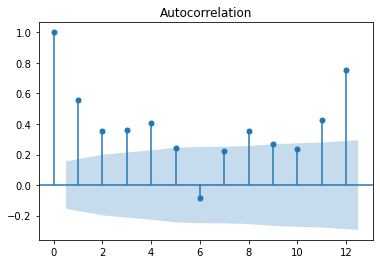

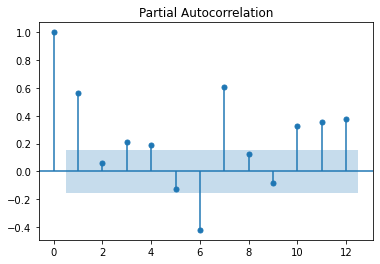

In [6]:
tsa.plot_acf(data['Footfalls'],lags=12)
tsa.plot_pacf(data['Footfalls'],lags=12)

In [7]:
def MAPE(prep,org):
    temp = np.abs((prep-org)/org)*100
    return np.mean(temp)

In [8]:
model = SimpleExpSmoothing(data['Footfalls']).fit(smoothing_level=0.6)
predict = model.predict(start=data.index[0],end=data.index[-1])
MAPE(predict,data['Footfalls'])

C:\Users\DELL\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


6.871923579558813

In [9]:
model = Holt(data['Footfalls']).fit(smoothing_level=0.6,smoothing_slope=0.3)
predict = model.predict(start=data.index[0],end=data.index[-1])
MAPE(predict,data['Footfalls'])

<ipython-input-9-859b695aa735>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model = Holt(data['Footfalls']).fit(smoothing_level=0.6,smoothing_slope=0.3)


7.157115182706222

In [10]:
model = ExponentialSmoothing(data['Footfalls'],seasonal='add',trend='add',seasonal_periods=12).fit()
predict = model.predict(start=data.index[0],end=data.index[-1])
MAPE(predict,data['Footfalls'])

2.5698916977399024

In [11]:
model.forecast(10)

159    2159.049612
160    2184.181287
161    2175.047623
162    2259.531412
163    2274.782926
164    1973.579880
165    2149.808584
166    2125.710663
167    2174.849726
168    1909.325993
dtype: float64

In [12]:
train = data.head(100)
test = data.tail(16)

In [13]:
model = smf.ols('Footfalls~t',data=train).fit()
predict = pd.Series(model.predict(pd.DataFrame(test['t'])))
x = np.sqrt(np.mean(np.array(test['Footfalls'])-np.array(predict))**2)
x

386.5962878787865

In [16]:
model = smf.ols('Footfalls~t',data=train).fit()
predict = pd.Series(model.predict(pd.DataFrame(test['t'])))
x = np.sqrt(np.mean(np.array(test['Footfalls'])-np.array(np.exp(predict))**2))
x

<ipython-input-16-b0e37a3fb40a>:3: RuntimeWarning: invalid value encountered in sqrt
  x = np.sqrt(np.mean(np.array(test['Footfalls'])-np.array(np.exp(predict))**2))


nan